## Visualize the latent space

We can visualize the latent space that the encoder generated by plotting the embeddings that it created from the input.

In [8]:
from tensorflow.keras import layers, models, datasets, callbacks
import numpy as np

"""
This section is borrowed from the Variational Autoencoders code samples 
"""
def preprocess_mnist_image(images):
    images = images.astype("float32") / 255.0
    images = np.pad(images, ((0,0), (2,2), (2,2)), constant_values = 0.0)
    images = np.expand_dims(images, -1)
    return images

(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

x_train = preprocess_mnist_image(x_train)
x_test = preprocess_mnist_image(x_test) 


encoder_input = layers.Input(shape=(32,32,1), name="encoder_input")
x = layers.Conv2D(32, (3,3), strides=2, activation="relu", padding="same")(encoder_input)
x = layers.Conv2D(64, (3,3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3,3), strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)

encoder_output = layers.Dense(2, name="encoder_output")(x)
encoder = models.Model(encoder_input, encoder_output)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


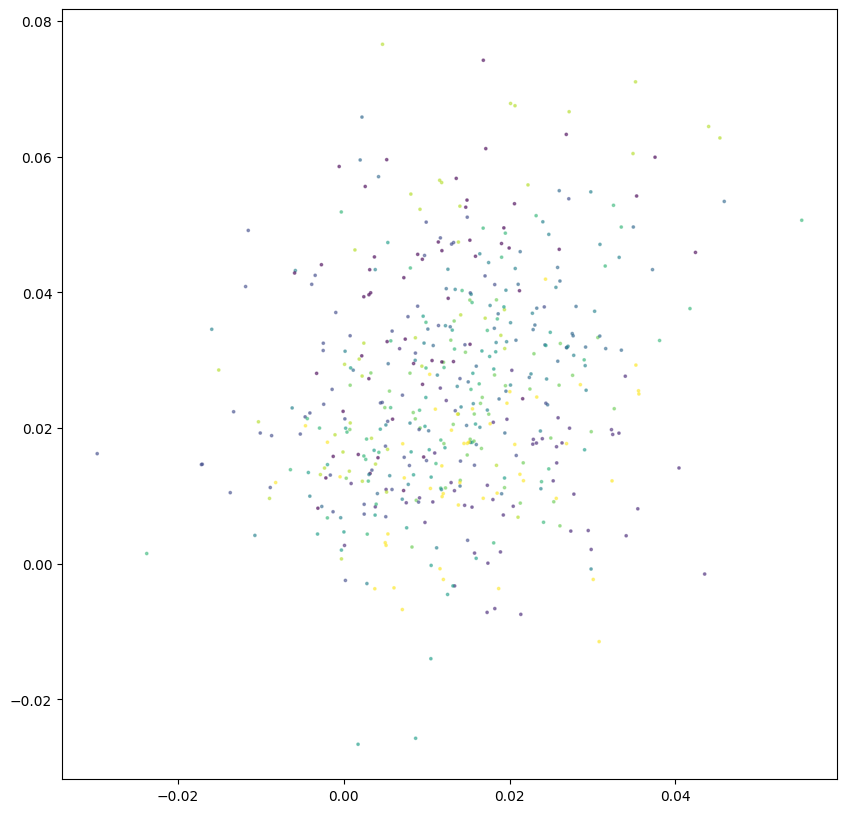

In [12]:
# Visualize a subset of the latent space
SUBSET_SIZE = 500

example_images = x_test[:SUBSET_SIZE] 
example_labels = y_test[:SUBSET_SIZE]
embeddings = encoder.predict(example_images)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=example_labels, alpha=.5, s=3)
plt.show()
